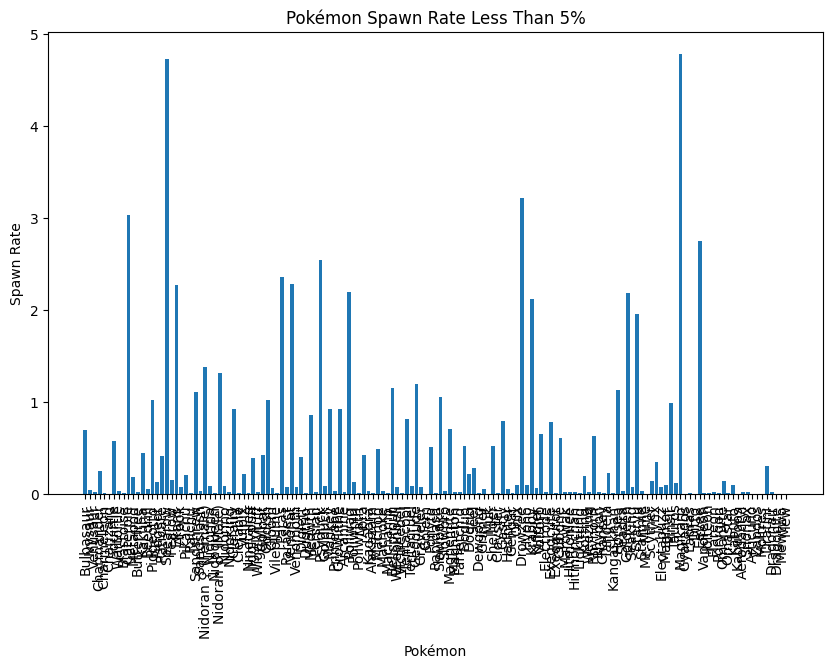

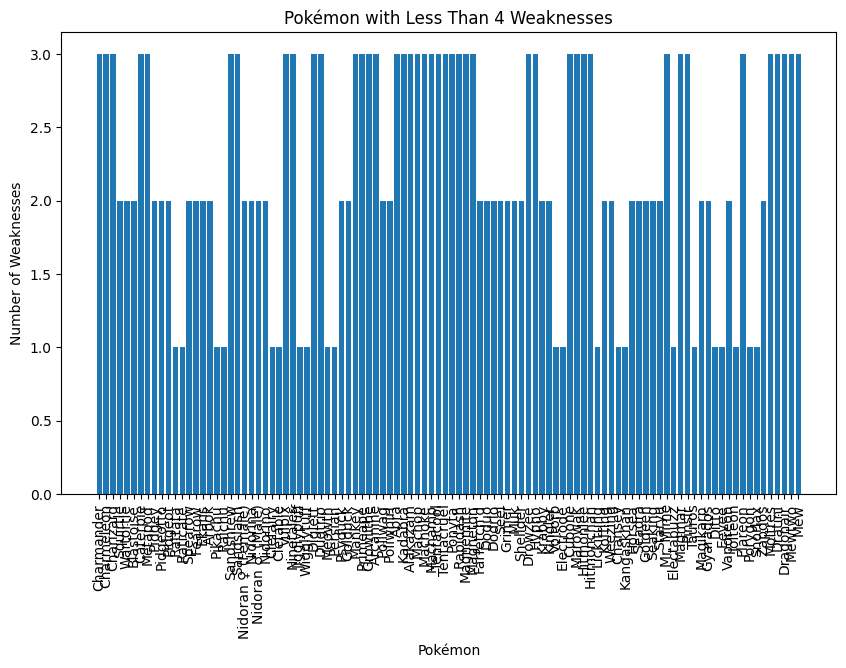

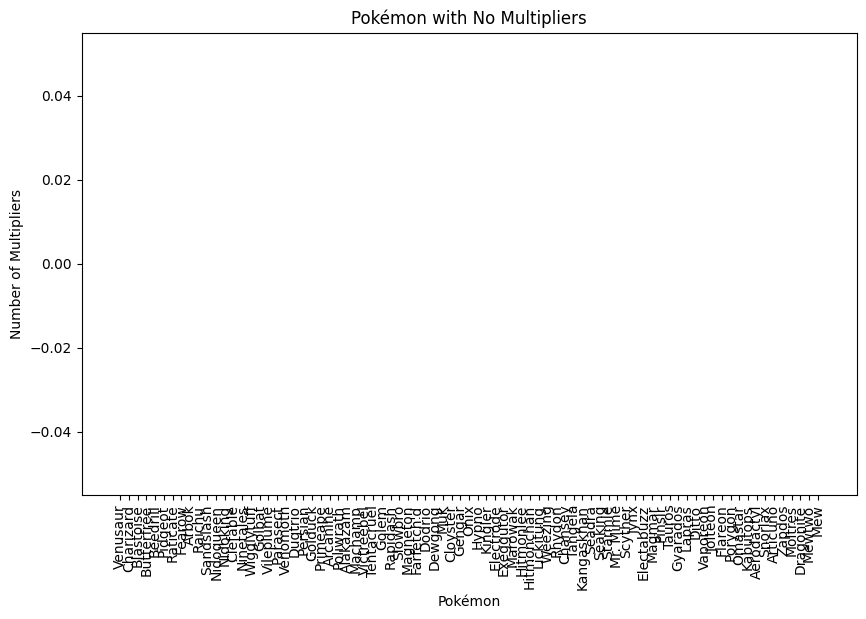

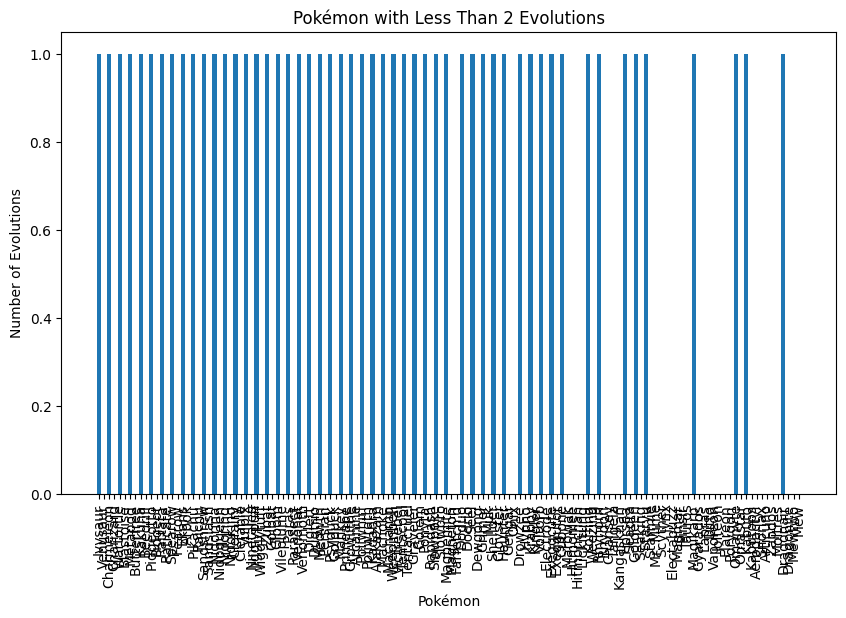

In [8]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Download the Pokémon data from the link
url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
response = requests.get(url)
data = response.json()

# Extract the list of Pokémon
pokemon_list = data['pokemon']

# Create a pandas DataFrame from the Pokémon data
df = pd.DataFrame(pokemon_list)

# Convert spawn time to seconds, handling 'N/A' values
df['spawn_time'] = df['spawn_time'].replace('N/A', '0:00')
df['spawn_time'] = pd.to_datetime(df['spawn_time'], format='%M:%S').dt.minute * 60 + pd.to_datetime(df['spawn_time'], format='%M:%S').dt.second


# Get all Pokémons whose spawn rate is less than 5%
spawn_rate_threshold = 5
spawn_rate_less_than_5 = df[df['spawn_chance'] < spawn_rate_threshold]

# Get all Pokémons that have less than 4 weaknesses
max_weaknesses = 4
pokemon_less_than_4_weaknesses = df[df['weaknesses'].apply(lambda x: len(x) if x is not None else 0) < max_weaknesses]


# Get all Pokémons that have no multipliers at all
no_multipliers = df[df['multipliers'].apply(lambda x: len(x) if x is not None else 0) == 0]


# Get all Pokémons that do not have more than 2 evolutions
max_evolutions = 2
pokemon_less_than_2_evolutions = df[df['next_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0) < max_evolutions]



# Get all Pokémons whose spawn time is less than 300 seconds
spawn_time_threshold = 300
spawn_time_less_than_300 = df[df['spawn_time'] < spawn_time_threshold]

# Get all Pokémons who have more than two types of capabilities
num_types_threshold = 2
pokemon_more_than_2_types = df[df['type'].apply(lambda x: len(x) if x is not None else 0) > num_types_threshold]

# Plotting the analysis

# Plotting Pokémon spawn rate less than 5%
plt.figure(figsize=(10, 6))
plt.bar(spawn_rate_less_than_5['name'], spawn_rate_less_than_5['spawn_chance'])
plt.xlabel('Pokémon')
plt.ylabel('Spawn Rate')
plt.title('Pokémon Spawn Rate Less Than 5%')
plt.xticks(rotation=90)
plt.show()

# Plotting Pokémon with less than 4 weaknesses
plt.figure(figsize=(10, 6))
plt.bar(pokemon_less_than_4_weaknesses['name'], pokemon_less_than_4_weaknesses['weaknesses'].apply(len))
plt.xlabel('Pokémon')
plt.ylabel('Number of Weaknesses')
plt.title('Pokémon with Less Than 4 Weaknesses')
plt.xticks(rotation=90)
plt.show()

# Plotting Pokémon with no multipliers
plt.figure(figsize=(10, 6))
plt.bar(no_multipliers['name'], no_multipliers['multipliers'].apply(lambda x: len(x) if x is not None else 0))
plt.xlabel('Pokémon')
plt.ylabel('Number of Multipliers')
plt.title('Pokémon with No Multipliers')
plt.xticks(rotation=90)
plt.show()

# Plotting Pokémon with less than 2 evolutions
plt.figure(figsize=(10, 6))
plt.bar(pokemon_less_than_2_evolutions['name'], pokemon_less_than_2_evolutions['next_evolution'].apply(lambda x: len(x) if isinstance(x, list) else 0))
plt.xlabel('Pokémon')
plt.ylabel('Number of Evolutions')
plt.title('Pokémon with Less Than 2 Evolutions')
plt.xticks(rotation=90)
plt.show()



